In [95]:
import sys
import importlib
sys.path.append('../src')

import experiment
from experiment.experiment import *
from preprocess.preprocess import *
import vectorize.vectorize
from vectorize.vectorize import *
import preprocess.preprocess
from model.keras_rnn import *
from cleaners.cleaners import *


import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

importlib.reload(experiment)
importlib.reload(vectorize.vectorize)

<module 'vectorize.vectorize' from '../src/vectorize/vectorize.py'>

In [51]:
import cleaners.taggers
importlib.reload(cleaners.taggers)

<module 'cleaners.taggers' from '../src/cleaners/taggers.py'>

In [102]:
data = pd.read_csv('../data/raw/train.csv')
#data.head()
data_train, data_test = train_test_split(data)
train = data_train
train = data_train.sample(2000)
X = train.comment_text
y = train.toxic
X_test = data_test.comment_text
y_test = data_test.toxic

In [103]:
test = cleaners.taggers.tag_all(X)

In [13]:
print(X.iloc[0])

Remove images or lose featured list status 

There is a discussion about Fair use images in featured lists at Wikipedia_talk:Featured_list_criteria#Fair_Use_images which may result in this list losing its featured list status. -


In [14]:
test.iloc[0]

'Remove images or lose featured list status \n\nThere is a discussion about Fair use images in featured lists at Wikipedia_talk:Featured_list_criteria#Fair_Use_images which may result in this list losing its featured list status. -'

In [13]:
import regex as re

In [25]:
text = """
''
A long text starting with newline and anding with quote
'
'
"""

In [26]:
text

"\n''\nA long text starting with newline and anding with quote\n'\n'\n"

In [27]:
re.sub(r'^[\'\"\n\#]*', '', text)

"A long text starting with newline and anding with quote\n'\n'\n"

In [29]:
re.sub(r'[\'\"\n\#]*$', '', text)

"\n''\nA long text starting with newline and anding with quote"

# Exploratory data analysis

In [82]:
def print_random_text(X, X_before=None, target=None, number_comments=1):
    size = len(X)
    for i in range(number_comments):
        idx = np.random.randint(size)
        print("Comment: {}\n".format(idx))
        print(X.iloc[idx], "\n")
        if not (X_before is None):
            print('***** Comment before ******\n', X_before.iloc[idx], "\n")
        if not (target is None):
            print("TARGETS: ",target.iloc[idx])
        print("\n"+"**"*30)
        print("**"*30, "\n")

In [110]:
print_random_text(X[X.str.len()>1000], number_comments=10)

Comment: 48

"

escape orbit (yeah, I did that on purpose), It looks like I am going to have to be uncivil to you because you are not getting my point otherwise. Simply put, you are a moron. Yes, you were being uncivil to me by assuming that I said ""because I want it in."" I never said that. That's how morons think, and hence this description for you. Your tone has been at least as combative as you think mine has, so you are the one who needs to calm down. Wikipedia editing actually isn't for you.
You obviously don't know quite how 3RR works. If someone reverts more than 3 times in the same day's worth of time, then they have broken 3RR. Not until then.
You guys may not be on the same exact team, but you claim ""consensus"" despite that I'm not part of that as one of the editors in the dispute. You still have not answered why you guys in that supposed ""consensus"" have gone deeper than you were already satisfied with before. Perhaps I should ask the one who is doing it most recently,

In [83]:
print_random_text(test, X_before=X, target=y, number_comments=1)

Comment: 1343

   Additions of  TAG_HTTP  
Please do not add advertising or inappropriate external links to Wikipedia. Wikipedia is not a mere directory of links nor should it be used for advertising or promotion.  Inappropriate links include (but are not limited to) links to personal web sites, links to web sites with which you are affiliated, and links that exist to attract visitors to a web site or promote a product.  See the external links guideline and spam policies for further explanations of links that are considered appropriate.  If you feel the link should be added to the article, then please discuss it on the  rather than re-adding it. See the welcome page to learn more about Wikipedia. Thank you.    

***** Comment before ******
 Additions of http://.smplace.com/ 
Please do not add advertising or inappropriate external links to Wikipedia. Wikipedia is not a mere directory of links nor should it be used for advertising or promotion.  Inappropriate links include (but are not l

In [85]:
def print_random_text_pattern(X, regex, verbose=False, toxic=False, y=None):
    """Takes a series of text X and a regex pattern and returns the comments that match this pattern."""
    mask = X.str.contains(regex)
    if toxic: mask = mask & y==1
    
    if verbose:
        print("Matches ratio = {}%".format(mask.mean()*100))
        print("Number of occurences = {}".format(mask.sum()))
    
    print_random_text(X[mask])

In [92]:
print_random_text_pattern(X, 'talk')

Comment: 1404

"
 Reasons for merger say, a article can be merged in the condition of if it is Duplicate, Overlaps, have very few Text or content. It depends upon the quality of the article as well. Instead of questing me support the merger proposal. There are numerous examples on Wikipedia, have a look of these two article Gonda district and Gonda, Uttar Pradesh. '''  {talk • contribs} " 


************************************************************
************************************************************ 



# Length of tokenized sentence

In [93]:
def compare_lengths(X_before, X_after):
    pass
    

In [94]:
import seaborn as sns

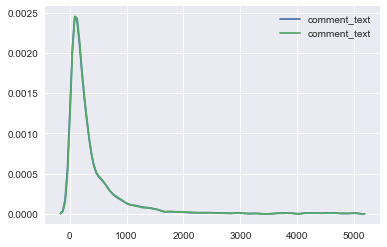

In [104]:
sns.kdeplot(X.str.len())
sns.kdeplot(test.str.len())

In [108]:
X.str.len() - test.str.len()

102735     -5
42023       0
101747      0
63908       0
146515    -18
2427        0
8775       -6
36541      -1
137405      2
142286     -6
58335      -4
81125      -2
157797     -6
147108     -6
101745     -6
75403     -10
67262      -5
145632      1
3552       -6
118532     -6
51333      -6
64077       1
136994     -6
103979     -6
146774     -6
146725     -6
147371     -6
150702     22
22222       0
129303     -7
         ... 
65997      -2
124084     -6
134580     -6
92379      -6
155493     -6
71976       2
142171     -6
77676     -12
125226     -3
106876     -6
28018      -1
78450      -3
54198      -6
63751      -3
148776     -9
95022     282
118486     -6
12081      -6
93931      16
148604     -6
92074      -6
66062       1
99505      -2
34792      -1
16828      -6
16771     -10
58752       3
66418     -24
32819      -1
78985     -18
Name: comment_text, Length: 2000, dtype: int64

In [1]:
import spacy

In [2]:
spacy.__version__

'2.0.7'